In [2]:
#Set Up Your Environment
#Make sure you have the required libraries installed:
#!pip install pandas matplotlib openpyxl statsmodels scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from sklearn.linear_model import LinearRegression


In [4]:
#Phase 1: Build Data Model, Data Cleaning and Preprocessing 

In [5]:
#Step 1: Load the Data

file_path = r"F:\Rawad Misr\Data Analysis\Projects\Final Projects\Final Project\Manufacturing_Line_Productivity.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)  # Read all sheets

# Check the keys (sheet names)
print(sheets_dict.keys())

Line_downtime = sheets_dict["Line downtime"]
df_productivity = sheets_dict["Line productivity"]
df_Products = sheets_dict["Products"]
Downtime_factors = sheets_dict["Downtime factors"]

dict_keys(['Line productivity', 'Products', 'Downtime factors', 'Line downtime'])


In [6]:
# Set display options to show all rows & columns
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent column wrapping

# Loop through each sheet and display its full content
for sheet_name, df in sheets_dict.items():
    print(f"\n🔹 Sheet: {sheet_name}\n")

    # Display DataFrame info before full content
    print("\n🔍 Data Info:")
    df.info()
    
    print("=" * 100)  # Separator for readability
    # Display full DataFrame
    print(df)


🔹 Sheet: Line productivity


🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        38 non-null     datetime64[ns]
 1   Product     38 non-null     object        
 2   Batch       38 non-null     int64         
 3   Operator    38 non-null     object        
 4   Start Time  38 non-null     object        
 5   End Time    38 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.9+ KB
         Date Product   Batch Operator Start Time  End Time
0  2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00
1  2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00
2  2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00
3  2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00
4  2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00
5  2024-08-29  LE-600  422116  Charlie   2

In [7]:
print(Line_downtime)

   Unnamed: 0  Downtime factor  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12
0       Batch              1.0         2.0         3.0         4.0         5.0         6.0         7.0         8.0         9.0         10.0         11.0         12.0
1      422111              NaN        60.0         NaN         NaN         NaN         NaN        15.0         NaN         NaN          NaN          NaN          NaN
2      422112              NaN        20.0         NaN         NaN         NaN         NaN         NaN        20.0         NaN          NaN          NaN          NaN
3      422113              NaN        50.0         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN
4      422114              NaN         NaN         NaN        25.0         NaN        15.0         NaN         NaN         NaN          NaN          NaN          NaN
5   

In [8]:
   # Replace NaN values with 0
Line_downtime.fillna(0, inplace=True)


In [9]:
Line_downtime.head()

,Unnamed: 0,Downtime factor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Batch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,422111,0.0,60.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
2,422112,0.0,20.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
3,422113,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,422114,0.0,0.0,0.0,25.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Read the sheet, skipping the first row
Line_downtime = pd.read_excel(file_path, sheet_name="Line downtime", header=1)

# Remove extra spaces from column names and ensure they are strings
Line_downtime.columns = Line_downtime.columns.astype(str).str.strip()

# Rename "Unnamed" downtime factor columns sequentially as "Factor 1" to "Factor 12"
for i, col in enumerate(Line_downtime.columns[1:], start=1):  # Skipping first column (Batch)
    if "Unnamed" in col or pd.isna(col):  # Handling NaN column names
        Line_downtime.rename(columns={col: f"Factor {i}"}, inplace=True)

# Identify the batch column (assuming it's the first column)
batch_col = Line_downtime.columns[0]  # First column should be "Batch"

# Reshape the data using melt
df_melted = Line_downtime.melt(id_vars=[batch_col], var_name="Downtime Factor", value_name="Minutes")

# Fill missing "Downtime Factor" cells correctly
if df_melted["Downtime Factor"].isna().sum() > 0:
    df_melted["Downtime Factor"] = df_melted["Downtime Factor"].fillna(method="ffill")


# Remove rows where "Minutes" is NaN
df_melted.dropna(subset=["Minutes"], inplace=True)

# Convert "Batch" column to numeric type and sort from smallest to largest
df_melted.dropna(subset=[batch_col], inplace=True)
df_melted.sort_values(by=[batch_col], inplace=True)


# Reset index and remove it from display
df_melted.reset_index(drop=True, inplace=True)

# Display the transformed data
print(df_melted.to_string(index=False))  # Removing index from output

 Batch Downtime Factor  Minutes
422111               2     60.0
422111               7     15.0
422112               2     20.0
422112               8     20.0
422113               2     50.0
422114               6     15.0
422114               4     25.0
422115              10     24.0
422117               2     10.0
422117               6      5.0
422118               6     14.0
422118              11     10.0
422118               7     16.0
422118              12     20.0
422119               4     25.0
422120               4     20.0
422120               9     17.0
422120               5     15.0
422121               7     15.0
422122               7     25.0
422123               4     43.0
422123               7     30.0
422124               5     20.0
422124               6     20.0
422125              11     10.0
422125              12     10.0
422126               8     44.0
422127               6     23.0
422128               5     22.0
422128               7     30.0
422129  

In [11]:
#Save the transformed data to a new sheet in the same Excel file
with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_melted.to_excel(writer, sheet_name="Transformed Line downtime", index=False)

    print("Transformed data has been saved successfully!")

Transformed data has been saved successfully!


In [12]:
# Add Operator Error & Downtime Classification Columns

# Load specific sheets into DataFrames
df_downtime = pd.read_excel(file_path, sheet_name="Transformed Line downtime")
df_factors = pd.read_excel(file_path, sheet_name="Downtime factors")

# Merge based on 'Downtime Factor' to bring in 'Operator Error'
df_downtime = df_downtime.merge(df_factors[['Factor', 'Operator Error']], 
                                left_on='Downtime Factor', 
                                right_on='Factor', 
                                how='left')

# Classify downtime as "Operator" or "Non-Operator"
df_downtime['Downtime Classification'] = df_downtime['Operator Error'].map({'Yes': 'Operator', 'No': 'Non-Operator'})

# Drop the extra "Factor" column
df_downtime.drop(columns=['Factor'], inplace=True)

# Load the original Excel file (to keep all sheets)
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_downtime.to_excel(writer, sheet_name="Transformed Line downtime", index=False)

    print("Sheet updated successfully!")

Sheet updated successfully!


In [13]:
# Convert L to mL.

# Read the "Products" sheet
df = pd.read_excel(file_path, sheet_name="Products")

# Function to convert L to ml
def convert_to_ml(size):
    if isinstance(size, str):
        if "L" in size:
            return float(size.replace("L", "").strip()) * 1000  # Convert Liters to ml
        elif "ml" in size:
            return float(size.replace("ml", "").strip())  # Keep ml values
    return size

# Apply conversion
df["Size"] = df["Size"].astype(str).apply(convert_to_ml)

# Load existing Excel file to preserve other sheets
with pd.ExcelWriter(file_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="Transformed Products", index=False)


In [14]:

# Convert "Start Time" and "End Time" to datetime format, keeping NaT for missing values
df_productivity["Start Time"] = pd.to_datetime(df_productivity["Start Time"], format="%H:%M:%S", errors="coerce")
df_productivity["End Time"] = pd.to_datetime(df_productivity["End Time"], format="%H:%M:%S", errors="coerce")

# Calculate the time difference (Batch Duration) in minutes
df_productivity["Batch Duration"] = (df_productivity["End Time"] - df_productivity["Start Time"]).dt.total_seconds() / 60

# Handle missing values
df_productivity.loc[df_productivity["End Time"].isna(), "Batch Duration"] = None
df_productivity.loc[df_productivity["Start Time"].isna(), "Batch Duration"] = None

# Handle cases where End Time is before Start Time (e.g., shift past midnight)
df_productivity["Batch Duration"] = df_productivity["Batch Duration"].apply(lambda x: x + 1440 if x < 0 else x)

# Convert "Start Time" and "End Time" back to string format to avoid date display in Excel
df_productivity["Start Time"] = df_productivity["Start Time"].dt.strftime("%H:%M:%S")
df_productivity["End Time"] = df_productivity["End Time"].dt.strftime("%H:%M:%S")

# Ensure "Batch Duration" remains numeric to prevent Excel from treating it as a date
df_productivity["Batch Duration"] = df_productivity["Batch Duration"].astype(float)

# ✅ Write the transformed data to a new sheet without modifying "Line productivity"
with pd.ExcelWriter(file_path, engine="openpyxl", mode="a") as writer:
    df_productivity.to_excel(writer, sheet_name="Transformed Line Productivity", index=False, float_format="%.2f")

# ✅ Display the transformed DataFrame
print(df_productivity)

print("Sheet 'Transformed Line Productivity' created successfully!")


         Date Product   Batch Operator Start Time  End Time  Batch Duration
0  2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00           135.0
1  2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00           100.0
2  2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00           110.0
3  2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00           100.0
4  2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00            84.0
5  2024-08-29  LE-600  422116  Charlie   20:39:00  21:39:00            60.0
6  2024-08-29  LE-600  422117  Charlie   21:39:00  22:54:00            75.0
7  2024-08-30  CO-600  422118      Dee   04:05:00  06:05:00           120.0
8  2024-08-30  CO-600  422119      Dee   06:05:00  07:30:00            85.0
9  2024-08-30  CO-600  422120      Dee   07:30:00  09:22:00           112.0
10 2024-08-30  CO-600  422121   Dennis   09:22:00  10:37:00            75.0
11 2024-08-30  CO-600  422122   Dennis   10:37:00  12:02:00            85.0
12 2024-08-3

In [15]:

# Load the necessary sheets
df_productivity = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")
df_products = pd.read_excel(file_path, sheet_name="Transformed Products")

# Ensure necessary columns exist
required_columns_productivity = ["Product"]
required_columns_products = ["Product", "Min batch time"]

for col in required_columns_productivity:
    if col not in df_productivity.columns:
        raise KeyError(f"❌ '{col}' column not found in 'Transformed Line Productivity' sheet.")

for col in required_columns_products:
    if col not in df_products.columns:
        raise KeyError(f"❌ '{col}' column not found in 'Products' sheet.")

# ✅ Merge "Min batch time" from "Transformed Products" into "Transformed Line Productivity"
df_productivity = df_productivity.merge(df_products[["Product", "Min batch time"]], on="Product", how="left")

# ✅ Save the updated sheet back to Excel, replacing the old one
with pd.ExcelWriter(file_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df_productivity.to_excel(writer, sheet_name="Transformed Line Productivity", index=False)

# ✅ Display the updated DataFrame
print(df_productivity)
print("✅ 'Transformed Line Productivity' sheet updated successfully!")


         Date Product   Batch Operator Start Time  End Time  Batch Duration  Min batch time
0  2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00             135              60
1  2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00             100              60
2  2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00             110              60
3  2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00             100              60
4  2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00              84              60
5  2024-08-29  LE-600  422116  Charlie   20:39:00  21:39:00              60              60
6  2024-08-29  LE-600  422117  Charlie   21:39:00  22:54:00              75              60
7  2024-08-30  CO-600  422118      Dee   04:05:00  06:05:00             120              60
8  2024-08-30  CO-600  422119      Dee   06:05:00  07:30:00              85              60
9  2024-08-30  CO-600  422120      Dee   07:30:00  09:22:00             112     

In [16]:

# Load the "Transformed Line Productivity" sheet
df_productivity = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# ✅ Ensure "Batch Duration" and "Min batch time" are numeric
df_productivity["Batch Duration"] = pd.to_numeric(df_productivity["Batch Duration"], errors="coerce")
df_productivity["Min batch time"] = pd.to_numeric(df_productivity["Min batch time"], errors="coerce")

# ✅ Handle missing values before calculations
df_productivity["Batch Duration"] = df_productivity["Batch Duration"].fillna(0)
df_productivity["Min batch time"] = df_productivity["Min batch time"].fillna(0)

# ✅ Calculate "Total Downtime by Batch" (Minutes)
df_productivity["Total Downtime by Batch"] = df_productivity["Batch Duration"] - df_productivity["Min batch time"]

# ✅ Ensure "Total Downtime by Batch" has no NaN values
df_productivity["Total Downtime by Batch"] = df_productivity["Total Downtime by Batch"].fillna(0)

# ✅ Ensure "Batch Duration" is always positive (Handle negative values if needed)
df_productivity["Batch Duration"] = df_productivity["Batch Duration"].apply(lambda x: x + 1440 if x < 0 else x)

# ✅ Save back to "Transformed Line Productivity" without modifying other sheets
with pd.ExcelWriter(file_path, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df_productivity.to_excel(writer, sheet_name="Transformed Line Productivity", index=False, float_format="%.2f")

# ✅ Display the updated DataFrame
print(df_productivity)
print("✅ 'Transformed Line Productivity' sheet updated successfully!")


         Date Product   Batch Operator Start Time  End Time  Batch Duration  Min batch time  Total Downtime by Batch
0  2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00             135              60                       75
1  2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00             100              60                       40
2  2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00             110              60                       50
3  2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00             100              60                       40
4  2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00              84              60                       24
5  2024-08-29  LE-600  422116  Charlie   20:39:00  21:39:00              60              60                        0
6  2024-08-29  LE-600  422117  Charlie   21:39:00  22:54:00              75              60                       15
7  2024-08-30  CO-600  422118      Dee   04:05:00  06:05:00     

In [17]:
#Phase 2: Analysis Questions 


In [18]:
#Productivity Analysis:

In [19]:
#Q1) How many different products were produced?

df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Count unique products
unique_products = df["Product"].nunique()

# Print result
print(f"Total Number of Different Products Produced: {unique_products}")


Total Number of Different Products Produced: 6


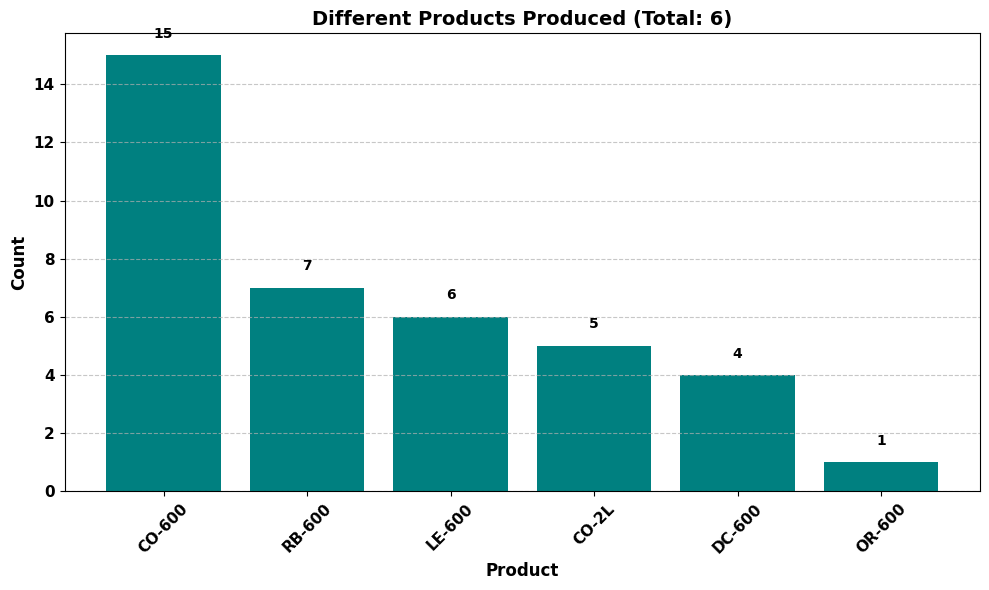

In [20]:
#Q1) How many different products were produced?

# Clean column names
df.columns = df.columns.str.strip()

# Count of each product
product_counts = df["Product"].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(product_counts.index, product_counts.values, color='teal')

# Add labels and title
plt.title(f"Different Products Produced (Total: {df['Product'].nunique()})", fontsize=14, fontweight='bold')
plt.xlabel("Product", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


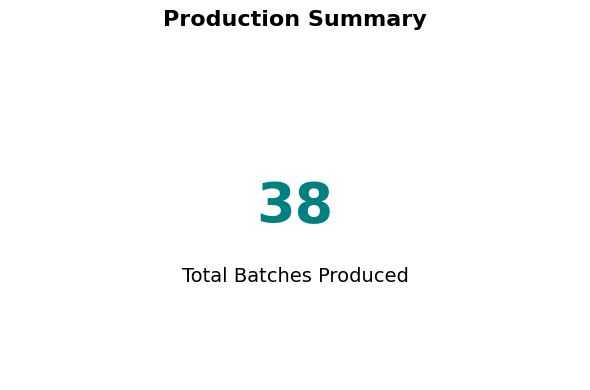

In [21]:
#Q2) What is the total number of batches produced?

# Total batches produced
total_batches = df["Batch"].count()

# Create a figure
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"{total_batches:,}", fontsize=40, fontweight="bold", ha="center", va="center", color="teal")
plt.text(0.5, 0.3, "Total Batches Produced", fontsize=14, ha="center", va="center")

# Remove axes
plt.axis("off")
plt.title("Production Summary", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [22]:
#Q2) What is the total number of batches produced?

df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Calculate the total number of batches produced
total_batches = df["Batch"].count()

# Print result
print(f"Total Number of Batches Produced: {total_batches}")

Total Number of Batches Produced: 38


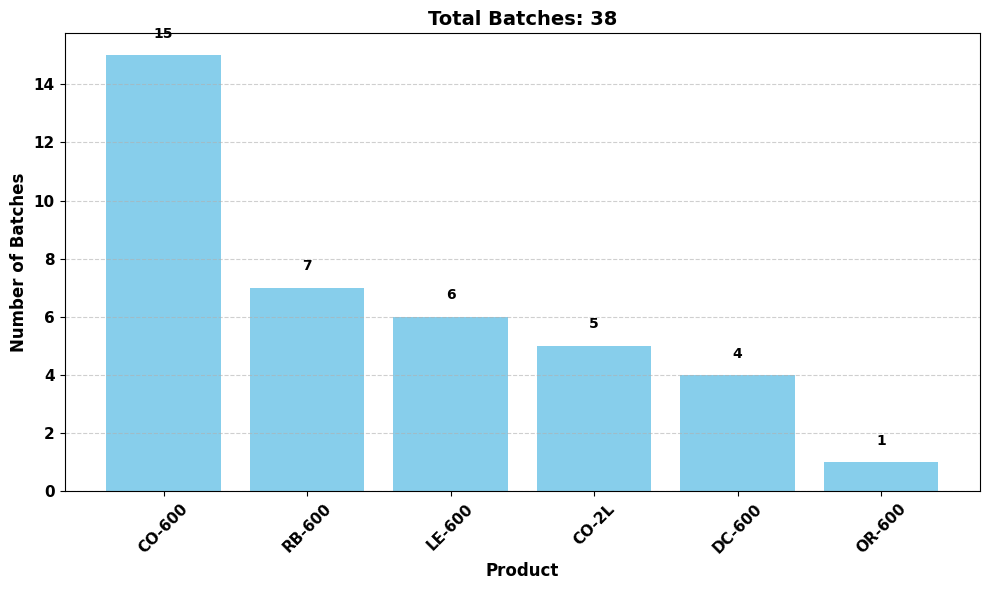

In [23]:
#Q2) What is the total number of batches produced?

# Count batches per product
batches_per_product = df["Product"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(batches_per_product.index, batches_per_product.values, color='skyblue')

# Labels and title
plt.title(f"Total Batches: {total_batches}", fontsize=14, fontweight="bold")
plt.xlabel("Product", fontsize=12, fontweight="bold")
plt.ylabel("Number of Batches", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [24]:
#Q3) How many operators were involved in production?

df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Identify unique operators (assuming the column name is "Operator")
num_operators = df["Operator"].nunique()

# Print result
print(f"Total Number of Unique Operators Involved: {num_operators}")

Total Number of Unique Operators Involved: 4


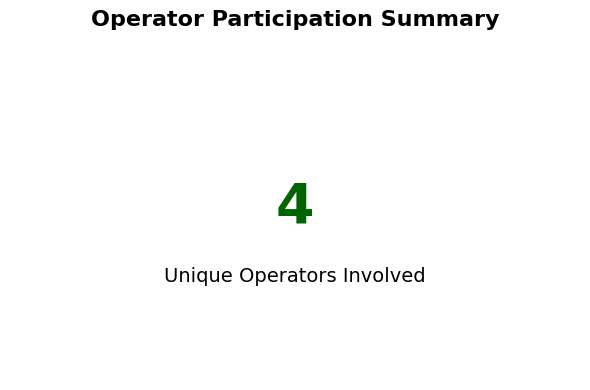

In [25]:
#Q3) How many operators were involved in production?

# Total number of unique operators
num_operators = df["Operator"].nunique()

# Big number chart
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"{num_operators}", fontsize=40, fontweight="bold", ha="center", va="center", color="darkgreen")
plt.text(0.5, 0.3, "Unique Operators Involved", fontsize=14, ha="center", va="center")

plt.axis("off")
plt.title("Operator Participation Summary", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


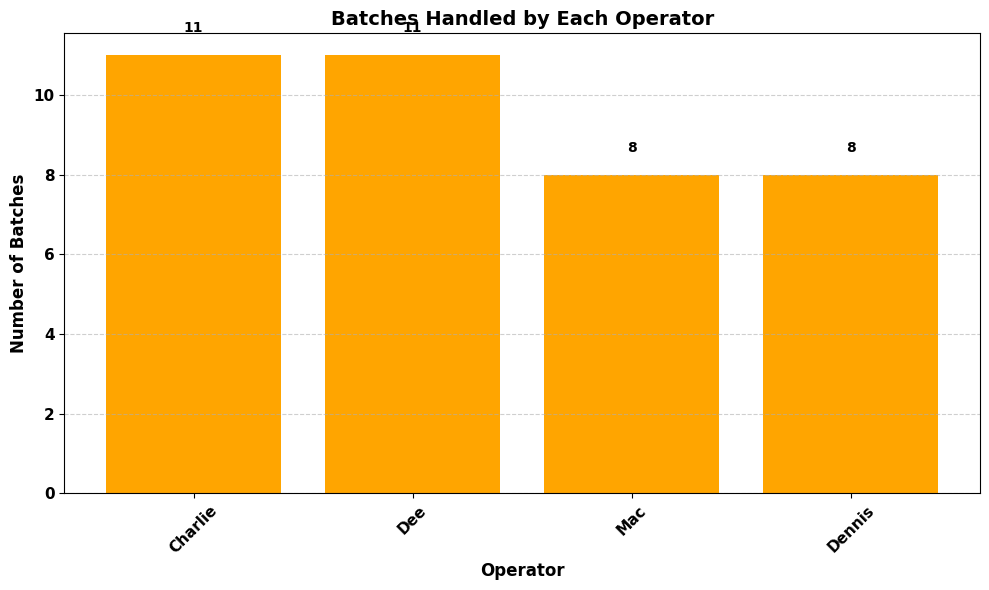

In [26]:
#Q3) How many operators were involved in production?

# Count batches per operator
batches_per_operator = df["Operator"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(batches_per_operator.index, batches_per_operator.values, color='orange')

# Labels and formatting
plt.title("Batches Handled by Each Operator", fontsize=14, fontweight="bold")
plt.xlabel("Operator", fontsize=12, fontweight="bold")
plt.ylabel("Number of Batches", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add data labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [27]:
#Q4) Which operators participated in the production process?

df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Get the list of unique operators
unique_operators = df["Operator"].dropna().unique()

# Print result
print("Operators Involved in Production:")
print(unique_operators)


Operators Involved in Production:
['Mac' 'Charlie' 'Dee' 'Dennis']


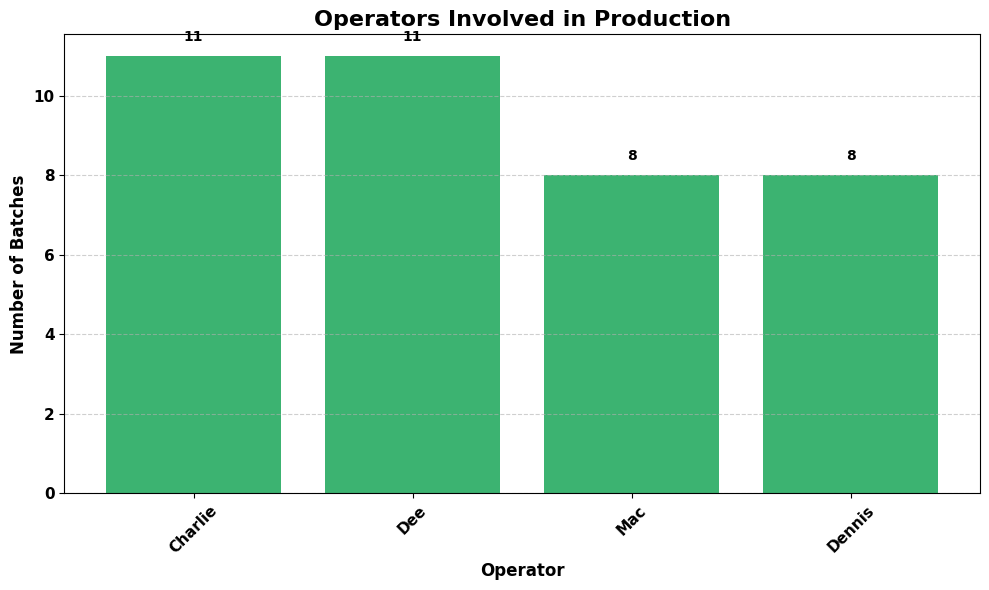

In [28]:
#Q4) Which operators participated in the production process?

# Count how many times each operator appears (participation level)
operator_counts = df["Operator"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(operator_counts.index.astype(str), operator_counts.values, color="mediumseagreen")

# Add labels and formatting
plt.title("Operators Involved in Production", fontsize=16, fontweight="bold")
plt.xlabel("Operator", fontsize=12, fontweight="bold")
plt.ylabel("Number of Batches", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [29]:
#Q5) What is the total production duration for each operator?

import warnings

# Suppress pandas warnings
warnings.simplefilter(action="ignore", category=UserWarning)


# Ensure 'Start Time' and 'End Time' are in datetime format
df["Start Time"] = pd.to_datetime(df["Start Time"])
df["End Time"] = pd.to_datetime(df["End Time"])

# Calculate batch duration in minutes
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60  

# Calculate total production duration for each operator
operator_durations = df.groupby("Operator")["Batch Duration"].sum().reset_index()

# Display production duration per operator
print(operator_durations)


  Operator  Batch Duration
0  Charlie          1158.0
1      Dee          1030.0
2   Dennis           820.0
3      Mac           850.0


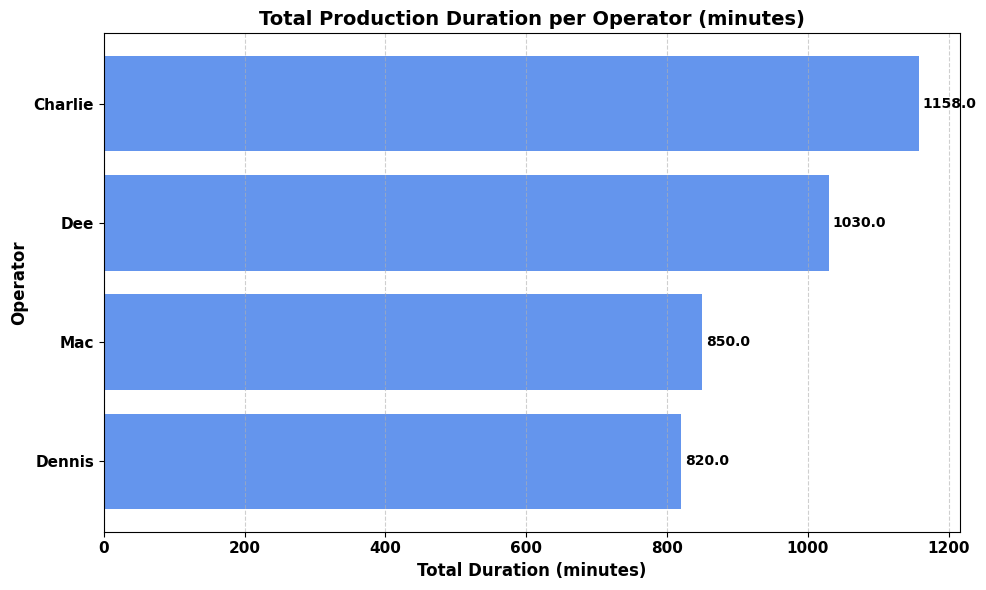

In [30]:
#Q5) What is the total production duration for each operator?

# Sort operators by total duration (descending)
operator_durations = operator_durations.sort_values(by="Batch Duration", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(operator_durations["Operator"].astype(str), 
                operator_durations["Batch Duration"], color="cornflowerblue")

# Labels and formatting
plt.title("Total Production Duration per Operator (minutes)", fontsize=14, fontweight="bold")
plt.xlabel("Total Duration (minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Operator", fontsize=12, fontweight="bold")
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Add duration labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


The product with the highest average production time is CO-2L with 153.40 minutes.


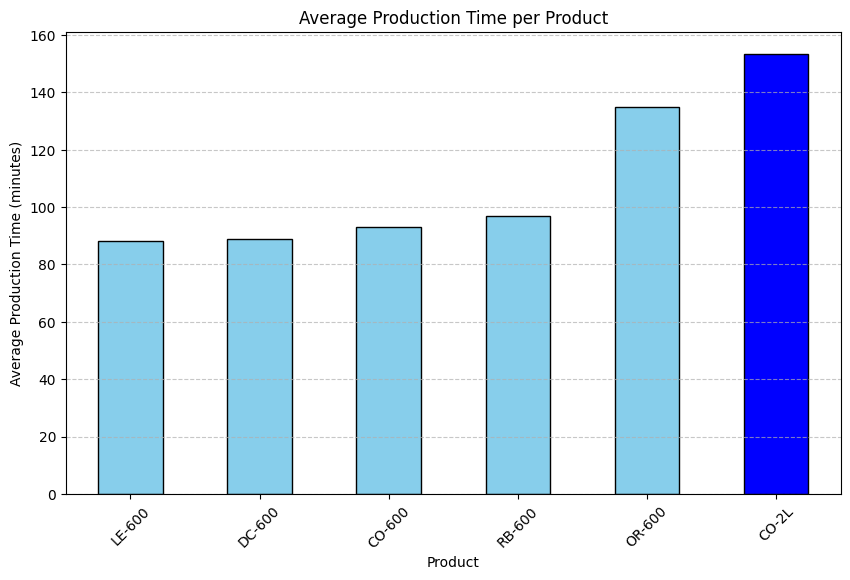

In [31]:
#Q6) Which product has the highest average production time?

# Load data
df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Calculate the average production time per product
avg_production_time = df.groupby("Product")["Batch Duration"].mean()

# Identify the product with the highest average production time
highest_avg_product = avg_production_time.idxmax()
highest_avg_time = avg_production_time.max()

print(f"The product with the highest average production time is {highest_avg_product} with {highest_avg_time:.2f} minutes.")

# Sort the values for better visualization
avg_production_time = avg_production_time.sort_values()

# Set bar colors: default skyblue, highlight the highest one in blue
colors = ["skyblue" if product != highest_avg_product else "blue" for product in avg_production_time.index]

# Plot the average production time per product
plt.figure(figsize=(10, 6))
avg_production_time.plot(kind="bar", color=colors, edgecolor="black")

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Average Production Time (minutes)")
plt.title("Average Production Time per Product")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

The most efficient operator based on total downtime by batch is Dennis with a total downtime of 302.00 minutes.


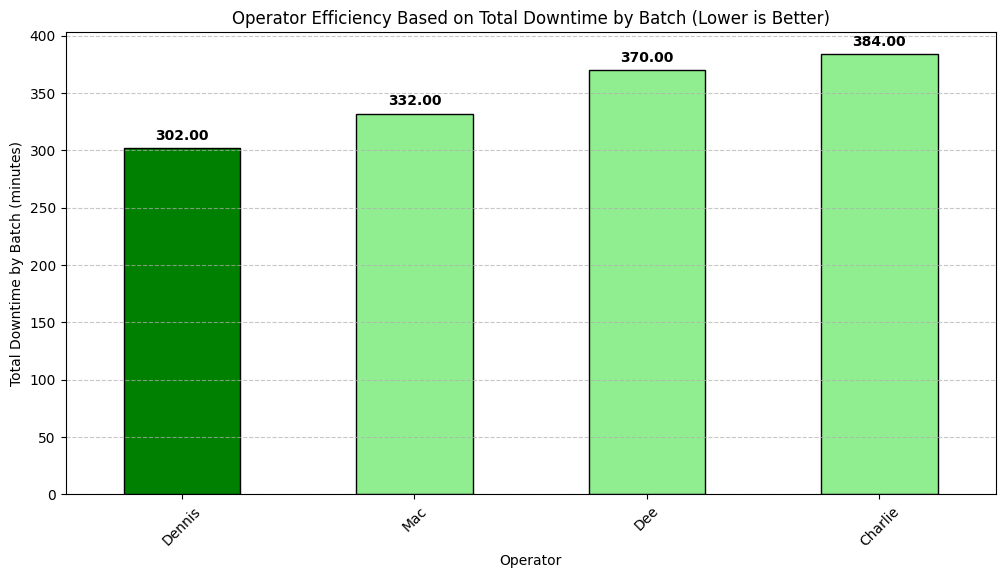

In [32]:
#Q7) Which operator is the most efficient in handling batches?


# Load the dataset
df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure names are stripped of spaces
df["Operator"] = df["Operator"].astype(str).str.strip()

# Calculate the total downtime for each operator
operator_total_downtime = df.groupby("Operator")["Total Downtime by Batch"].sum()

# Sort operators by lowest total downtime (smallest first)
operator_total_downtime = operator_total_downtime.sort_values(ascending=True)

# Identify the most efficient operator (lowest total downtime)
most_efficient_operator = operator_total_downtime.idxmin()
lowest_total_downtime = operator_total_downtime.min()

print(f"The most efficient operator based on total downtime by batch is {most_efficient_operator} with a total downtime of {lowest_total_downtime:.2f} minutes.")

# Assign colors (highlight only the most efficient operator)
colors = ["lightgreen" if operator != most_efficient_operator else "green" for operator in operator_total_downtime.index]

# Plot total downtime per operator
plt.figure(figsize=(12, 6))
bars = operator_total_downtime.plot(kind="bar", color=colors, edgecolor="black")

# Add text labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
             bar.get_height() + 5,  # Y position (slightly above the bar)
             f"{bar.get_height():.2f}",  # Text (total downtime)
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Add labels and title
plt.xlabel("Operator")
plt.ylabel("Total Downtime by Batch (minutes)")
plt.title("Operator Efficiency Based on Total Downtime by Batch (Lower is Better)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Columns in DataFrame: Index(['Date', 'Product', 'Batch', 'Operator', 'Start Time', 'End Time',
       'Batch Duration', 'Min batch time', 'Total Downtime by Batch'],
      dtype='object')

Total Production Duration per Product:
  Product  Batch Duration
0   CO-2L           767.0
1  CO-600          1394.0
2  DC-600           355.0
3  LE-600           529.0
4  OR-600           135.0
5  RB-600           678.0


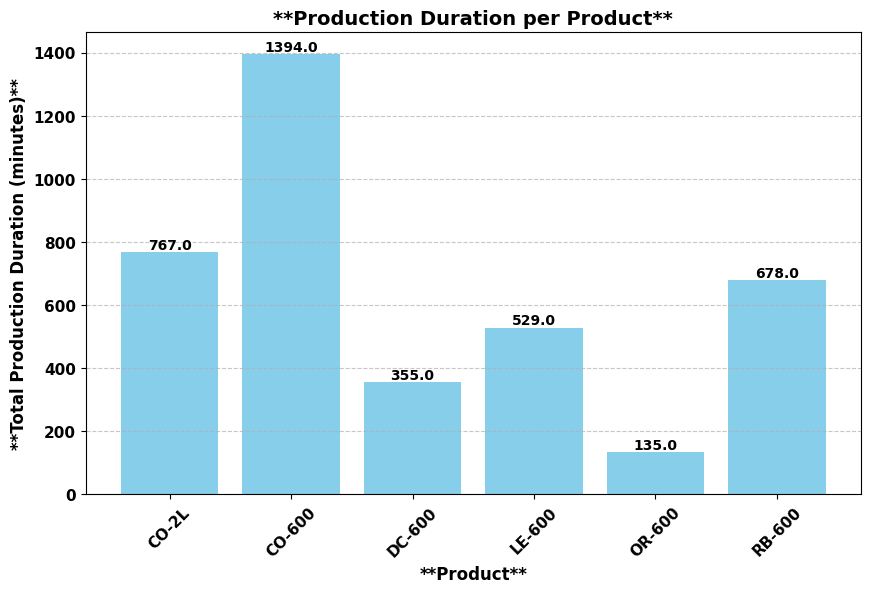

In [33]:
# Q8) **What is the production duration for each product?**


# **Suppress pandas warnings**
warnings.simplefilter(action="ignore", category=UserWarning)

# **Display column names (for debugging)**
print("Columns in DataFrame:", df.columns)

# **Convert 'Start Time' and 'End Time' to datetime format safely**
df["Start Time"] = pd.to_datetime(df["Start Time"], errors="coerce", infer_datetime_format=True)
df["End Time"] = pd.to_datetime(df["End Time"], errors="coerce", infer_datetime_format=True)

# **Calculate batch duration in minutes**
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60

# **Calculate total production duration per product**
product_durations = df.groupby("Product")["Batch Duration"].sum().reset_index()

# **Display results**
print("\nTotal Production Duration per Product:")
print(product_durations)

# **Visualize the results with bold labels and value labels**
plt.figure(figsize=(10, 6))
bars = plt.bar(product_durations["Product"], product_durations["Batch Duration"], color="skyblue")

# **Bold labels and title**
plt.xlabel("**Product**", fontsize=12, fontweight="bold")  
plt.ylabel("**Total Production Duration (minutes)**", fontsize=12, fontweight="bold")  
plt.title("**Production Duration per Product**", fontsize=14, fontweight="bold")  
plt.xticks(rotation=45, fontsize=11, fontweight="bold")  # Rotate and bold x-axis labels
plt.yticks(fontsize=11, fontweight="bold")  # Bold y-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# **Add labels on top of bars**
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height,  # Y-coordinate (bar height)
        f"{height:.1f}",  # Display value with 1 decimal place
        ha="center",  # Center alignment
        va="bottom",  # Position slightly above the bar
        fontsize=10,
        fontweight="bold",
        color="black",
    )

# **Show the plot**
plt.show()


In [34]:
#Q9) What is the minimum batch duration for each product?

# Try automatic datetime parsing
df["Start Time"] = pd.to_datetime(df["Start Time"], errors="coerce")
df["End Time"] = pd.to_datetime(df["End Time"], errors="coerce")

# Check if conversion failed (print rows where datetime conversion failed)
print(df[df["Start Time"].isna() | df["End Time"].isna()])  

# Calculate batch duration in minutes
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60

# Drop rows where batch duration is NaN
df = df.dropna(subset=["Batch Duration"])

# Find the minimum batch duration per product
min_batch_time_per_product = df.groupby("Product")["Batch Duration"].min().reset_index()

# Display results
print(min_batch_time_per_product)


Empty DataFrame
Columns: [Date, Product, Batch, Operator, Start Time, End Time, Batch Duration, Min batch time, Total Downtime by Batch]
Index: []
  Product  Batch Duration
0   CO-2L           120.0
1  CO-600            60.0
2  DC-600            60.0
3  LE-600            60.0
4  OR-600           135.0
5  RB-600            67.0


In [35]:
#Q10) What is the duration of each batch?

# Convert "Start Time" and "End Time" to datetime (adding a date)
df["Start Time"] = pd.to_datetime(df["Start Time"], format="%H:%M:%S").apply(lambda x: x.replace(year=2024, month=9, day=2))
df["End Time"] = pd.to_datetime(df["End Time"], format="%H:%M:%S").apply(lambda x: x.replace(year=2024, month=9, day=3))

# Save back to Excel
df.to_excel("Updated_Manufacturing.xlsx", index=False)

# Update incorrect Start Time and End Time for Batch 422148
df.loc[df["Batch"] == 422148, "Start Time"] = "2024-09-02 22:55:00"
df.loc[df["Batch"] == 422148, "End Time"] = "2024-09-03 01:05:00"

# Convert Start Time and End Time to datetime format
df["Start Time"] = pd.to_datetime(df["Start Time"])
df["End Time"] = pd.to_datetime(df["End Time"])

# Calculate Batch Duration in minutes
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60

# Display batch durations
batch_durations = df[["Batch", "Batch Duration"]]
print(batch_durations)


     Batch  Batch Duration
0   422111          1575.0
1   422112          1540.0
2   422113          1550.0
3   422114          1540.0
4   422115          1524.0
5   422116          1500.0
6   422117          1515.0
7   422118          1560.0
8   422119          1525.0
9   422120          1552.0
10  422121          1515.0
11  422122          1525.0
12  422123          1573.0
13  422124          1540.0
14  422125          1520.0
15  422126          1544.0
16  422127          1523.0
17  422128          1552.0
18  422129          1515.0
19  422130          1520.0
20  422131          1530.0
21  422132          1500.0
22  422133          1520.0
23  422134          1550.0
24  422135          1545.0
25  422136          1500.0
26  422137          1545.0
27  422138          1520.0
28  422139          1535.0
29  422140          1563.0
30  422141          1507.0
31  422142          1530.0
32  422143          1558.0
33  422144          1592.0
34  422145          1560.0
35  422146          1600.0
3

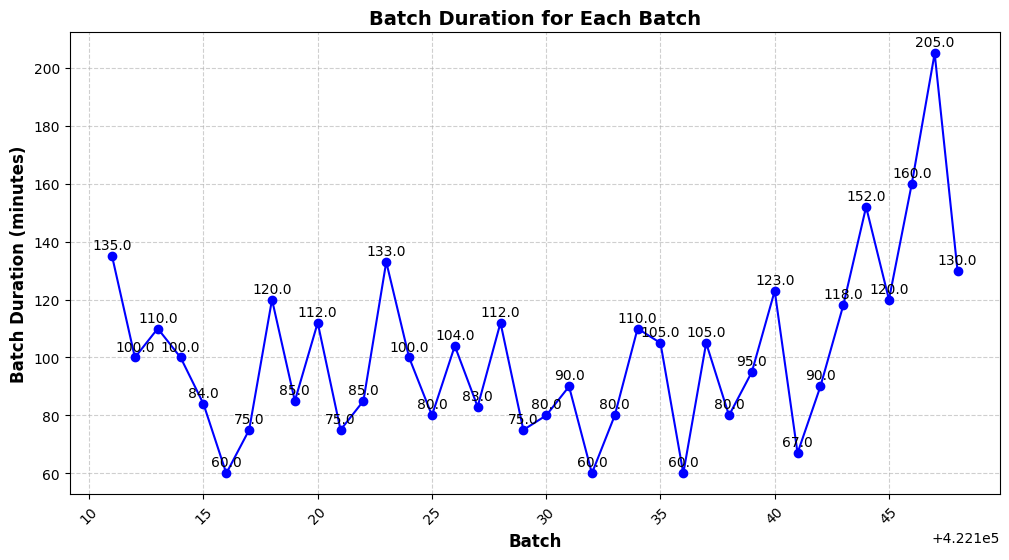

In [65]:
#Q10) What is the duration of each batch?

# Convert "Start Time" and "End Time" to datetime format
df["Start Time"] = pd.to_datetime(df["Start Time"], errors="coerce")
df["End Time"] = pd.to_datetime(df["End Time"], errors="coerce")

# Calculate Batch Duration in minutes
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60

# Sort data by Batch for visualization
df_sorted = df.sort_values(by="Batch")

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Batch"], df_sorted["Batch Duration"], marker="o", linestyle="-", color="b")

# Labeling
plt.xlabel("Batch", fontsize=12, fontweight="bold")
plt.ylabel("Batch Duration (minutes)", fontsize=12, fontweight="bold")
plt.title("Batch Duration for Each Batch", fontsize=14, fontweight="bold")

# Display labels for each point
for i, txt in enumerate(df_sorted["Batch Duration"]):
    plt.annotate(f"{txt:.1f}", (df_sorted["Batch"].iloc[i], df_sorted["Batch Duration"].iloc[i]), 
                 textcoords="offset points", xytext=(0,5), ha="center", fontsize=10)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


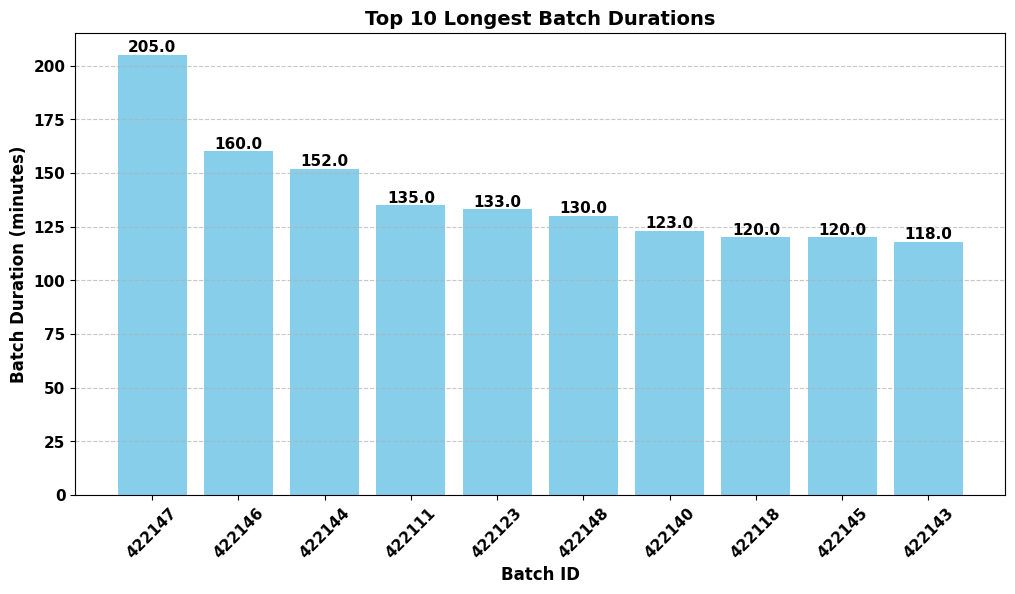

In [37]:

#Q11) Which Top 10 Batches with Most Batch Duration ?

# Convert "Start Time" and "End Time" to datetime format
df["Start Time"] = pd.to_datetime(df["Start Time"], format="%H:%M:%S", errors="coerce")
df["End Time"] = pd.to_datetime(df["End Time"], format="%H:%M:%S", errors="coerce")

# Ensure no NaT values exist
df = df.dropna(subset=["Start Time", "End Time"])

# Assign a fixed date (September 2, 2024)
base_date = pd.Timestamp("2024-09-02")

# Add time component as a timedelta
df["Start Time"] = base_date + df["Start Time"].dt.hour.astype("timedelta64[h]") + \
                   df["Start Time"].dt.minute.astype("timedelta64[m]") + \
                   df["Start Time"].dt.second.astype("timedelta64[s]")

df["End Time"] = base_date + df["End Time"].dt.hour.astype("timedelta64[h]") + \
                 df["End Time"].dt.minute.astype("timedelta64[m]") + \
                 df["End Time"].dt.second.astype("timedelta64[s]")

# Fix incorrect Start Time and End Time for Batch 422148
df.loc[df["Batch"] == 422148, "Start Time"] = pd.Timestamp("2024-09-02 22:55:00")
df.loc[df["Batch"] == 422148, "End Time"] = pd.Timestamp("2024-09-03 01:05:00")

# Recalculate Batch Duration in minutes
df["Batch Duration"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60

# Select top 10 longest batch durations for visualization
top_batches = df.nlargest(10, "Batch Duration")

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_batches["Batch"].astype(str), top_batches["Batch Duration"], color="skyblue")

# Labels and title
plt.xlabel("Batch ID", fontsize=12, fontweight="bold")
plt.ylabel("Batch Duration (minutes)", fontsize=12, fontweight="bold")
plt.title("Top 10 Longest Batch Durations", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")

# Display values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}", 
             ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [38]:
#Downtime Analysis:


In [39]:
#Q12) What are the most common downtime factors?

df = pd.read_excel(file_path, sheet_name="Transformed Line downtime")

# Count occurrences of each downtime factor
common_downtime_factors = df["Downtime Factor"].value_counts()

# Get the most common downtime factor(s)
most_common_factor = common_downtime_factors.idxmax()
most_common_count = common_downtime_factors.max()

print(f"The most common downtime factor is '{most_common_factor}' with {most_common_count} occurrences.")


The most common downtime factor is '6' with 12 occurrences.


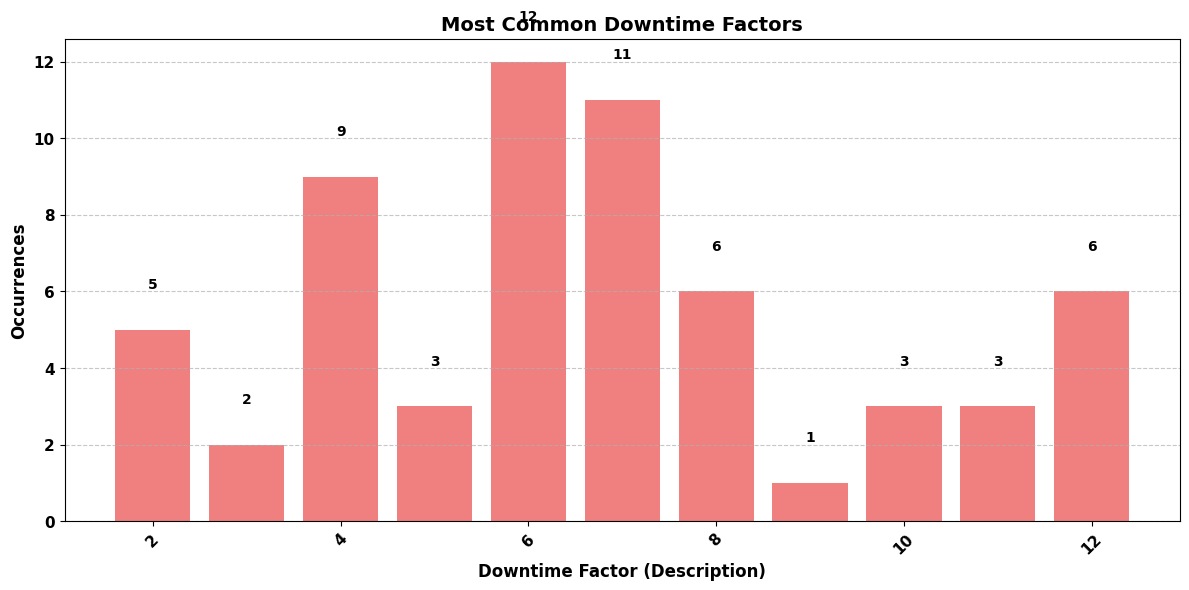

In [40]:
# Q12) **What are the most common downtime factors?**

# Visualize the most common downtime factors
plt.figure(figsize=(12, 6))
bars = plt.bar(common_downtime_factors.index, common_downtime_factors.values, color="lightcoral")

# Bold labels and title
plt.xlabel("Downtime Factor (Description)", fontsize=12, fontweight="bold")  
plt.ylabel("Occurrences", fontsize=12, fontweight="bold")  
plt.title("Most Common Downtime Factors", fontsize=14, fontweight="bold")  
plt.xticks(rotation=45, fontsize=11, fontweight="bold")  # Rotate and bold x-axis labels
plt.yticks(fontsize=11, fontweight="bold")  # Bold y-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ✅ Add only the count as label (remove description text)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{int(height)}",  # Only show the count
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="black"
    )

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
#Q13) How many factors influence downtime?

# Load the "Downtime Factors" sheet
df = pd.read_excel(r"F:\Rawad Misr\Data Analysis\Projects\Final Projects\Final Project\Manufacturing_Line_Productivity.xlsx", sheet_name="Downtime factors")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Count unique downtime factors
num_factors = df["Description"].nunique()

# Print result
print(f"Total Number of Factors Influencing Downtime: {num_factors}")


Total Number of Factors Influencing Downtime: 12


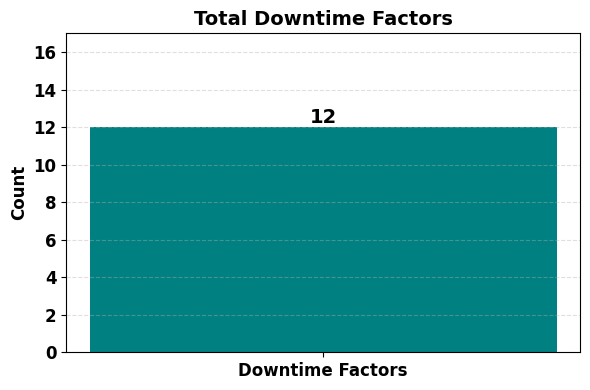

In [42]:
#Q13) How many factors influence downtime?

# Load data
df = pd.read_excel(r"F:\Rawad Misr\Data Analysis\Projects\Final Projects\Final Project\Manufacturing_Line_Productivity.xlsx", sheet_name="Downtime factors")
df.columns = df.columns.str.strip()

# Count unique factors
num_factors = df["Description"].nunique()

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(["Downtime Factors"], [num_factors], color="teal")
plt.title("Total Downtime Factors", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Annotate the bar with the count
plt.text(0, num_factors + 0.2, str(num_factors), ha="center", fontsize=14, fontweight="bold", color="black")

plt.ylim(0, num_factors + 5)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


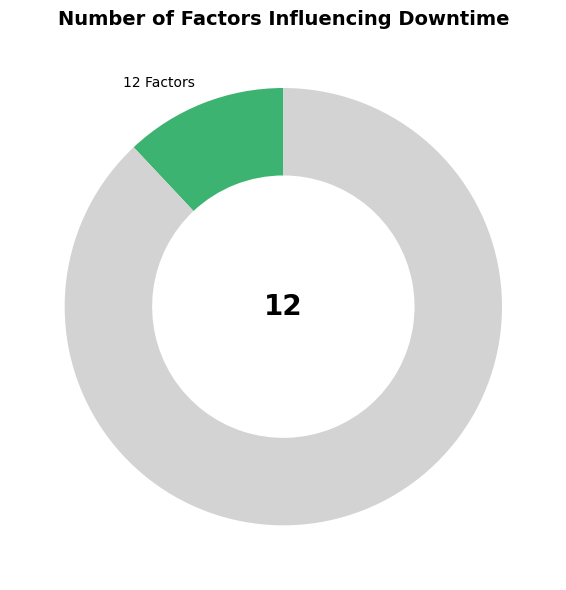

In [43]:
#Q13) How many factors influence downtime?

# Donut chart
plt.figure(figsize=(6, 6))
plt.pie([num_factors, 100 - num_factors], labels=[f"{num_factors} Factors", ""], startangle=90,
        colors=["mediumseagreen", "lightgrey"], wedgeprops={'width': 0.4})

plt.title("Number of Factors Influencing Downtime", fontsize=14, fontweight="bold")
plt.text(0, 0, str(num_factors), ha='center', va='center', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


📌 Total Number of Factors Influencing Downtime: 12

✅ Operator-Related Downtime Factors:
Total: 6
- Batch change
- Product spill
- Machine adjustment
- Batch coding error
- Calibration error
- Label switch

❌ Non-Operator-Related Downtime Factors:
Total: 6
- Emergency stop
- Labeling error
- Inventory shortage
- Machine failure
- Conveyor belt jam
- Other


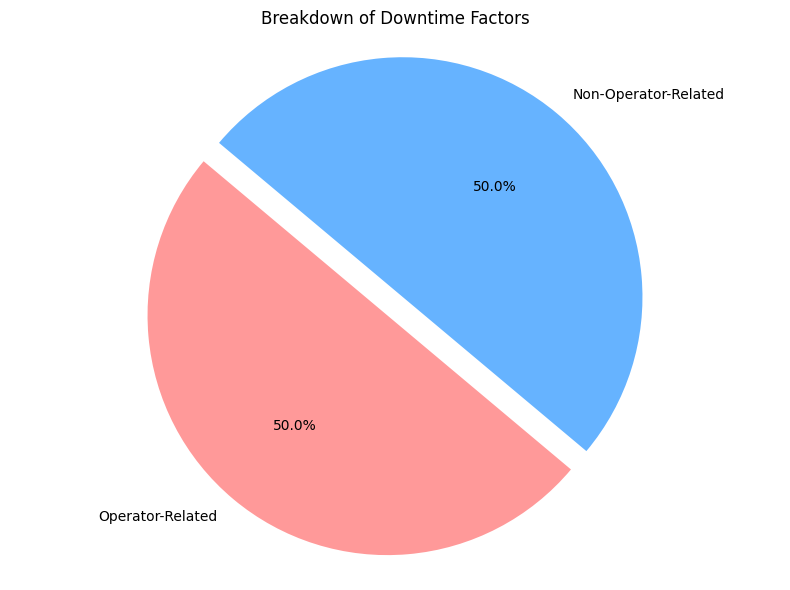

In [44]:
#Q14) How many factors influence downtime, and what are they?

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Classify downtime factors
operator_factors = df[df["Operator Error"] == "Yes"]["Description"].unique()
non_operator_factors = df[df["Operator Error"] == "No"]["Description"].unique()

# Count unique factors in each category
num_operator_factors = len(operator_factors)
num_non_operator_factors = len(non_operator_factors)

# Print results
print(f"📌 Total Number of Factors Influencing Downtime: {num_operator_factors + num_non_operator_factors}\n")

print("✅ Operator-Related Downtime Factors:")
print(f"Total: {num_operator_factors}")
for factor in operator_factors:
    print("-", factor)

print("\n❌ Non-Operator-Related Downtime Factors:")
print(f"Total: {num_non_operator_factors}")
for factor in non_operator_factors:
    print("-", factor)

# Visualization
labels = ['Operator-Related', 'Non-Operator-Related']
sizes = [num_operator_factors, num_non_operator_factors]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Highlight the operator-related section

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode)
plt.title('Breakdown of Downtime Factors')
plt.axis('equal')  # Keep the pie chart circular
plt.tight_layout()
plt.show()


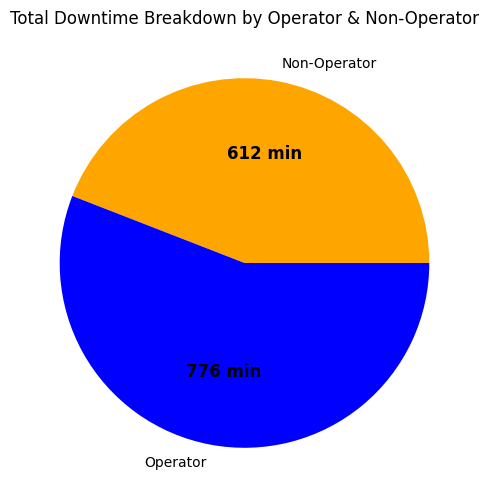

In [45]:
#Q15) How much downtime is caused by operator errors vs. other causes in Minutes ?

# Aggregate total downtime minutes by classification
downtime_summary = df_downtime.groupby("Downtime Classification")["Minutes"].sum()

# Function to display absolute values instead of percentages
def absolute_values(values):
    return [f"{v:.0f} min" for v in values]

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    downtime_summary, labels=downtime_summary.index, 
    colors=["orange", "blue"], autopct=lambda p: f"{p * sum(downtime_summary) / 100:.0f} min"
)

# Format text size
for text in autotexts:
    text.set_fontsize(12)
    text.set_fontweight("bold")

# Add title
plt.title("Total Downtime Breakdown by Operator & Non-Operator")

# Show plot
plt.show()


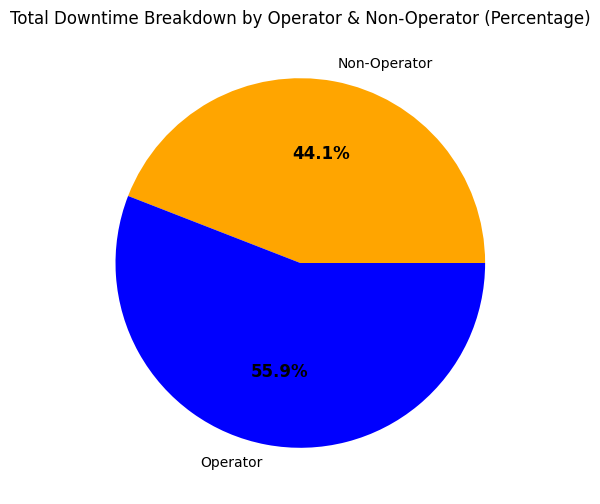

In [46]:
#Q16) How much downtime is caused by operator errors vs. other causes in Percentage ?

# Aggregate total downtime minutes by classification
downtime_summary = df_downtime.groupby("Downtime Classification")["Minutes"].sum()

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    downtime_summary, labels=downtime_summary.index, 
    colors=["orange", "blue"], autopct='%1.1f%%'  # Display percentage
)

# Format text size
for text in autotexts:
    text.set_fontsize(12)
    text.set_fontweight("bold")

# Add title
plt.title("Total Downtime Breakdown by Operator & Non-Operator (Percentage)")

# Show plot
plt.show()


In [47]:
#Q17) What is the total downtime recorded?


df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Calculate total downtime
total_downtime = df["Total Downtime by Batch"].sum()

# Print result
print(f"Total Downtime Recorded: {total_downtime} minutes")


Total Downtime Recorded: 1388 minutes


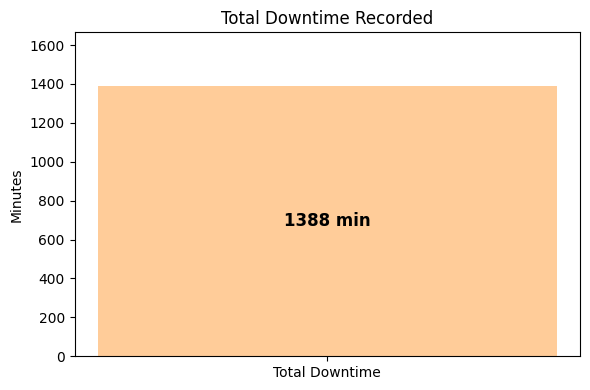

In [48]:

# Ensure column names are stripped of spaces
df_productivity.columns = df_productivity.columns.str.strip()

# Calculate total downtime
total_downtime = df_productivity["Total Downtime by Batch"].sum()

# Visualization: Total Downtime as a single metric bar
plt.figure(figsize=(6, 4))
plt.bar(["Total Downtime"], [total_downtime], color='#ffcc99')
plt.ylabel("Minutes")
plt.title("Total Downtime Recorded")
plt.text(0, total_downtime/2, f"{total_downtime:.0f} min", ha='center', va='center', fontsize=12, weight='bold')
plt.ylim(0, total_downtime * 1.2)
plt.tight_layout()
plt.show()


In [49]:
#Q18) What is the total downtime for each day?


# Load the "Transformed Line Productivity" sheet
df = pd.read_excel(r"F:\Rawad Misr\Data Analysis\Projects\Final Projects\Final Project\Manufacturing_Line_Productivity.xlsx", sheet_name="Transformed Line Productivity")

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Group by Date and sum the total downtime
daily_downtime = df.groupby(df["Date"].dt.date)["Total Downtime by Batch"].sum().reset_index()

# Rename columns for clarity
daily_downtime.columns = ["Date", "Total Downtime by Batch"]

# Print results
print(daily_downtime)


         Date  Total Downtime by Batch
0  2024-08-29                      244
1  2024-08-30                      444
2  2024-08-31                      165
3  2024-09-02                      503
4  2024-09-03                       32


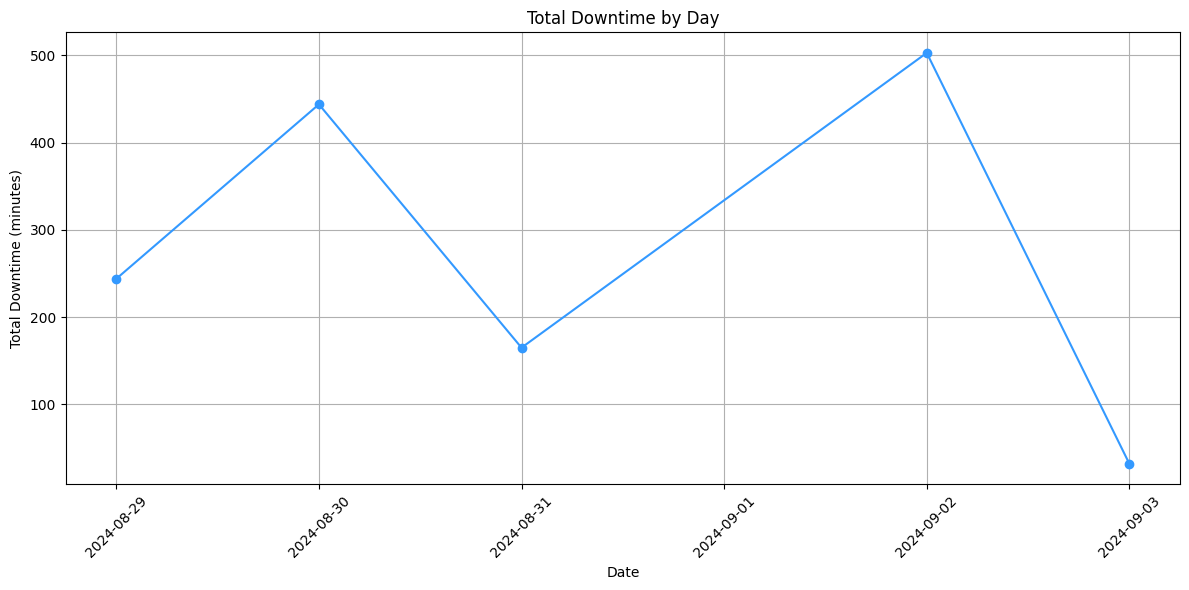

In [50]:
#Q18) What is the total downtime for each day?

# Convert "Date" column to datetime format
df_productivity["Date"] = pd.to_datetime(df_productivity["Date"])

# Group by Date and sum the total downtime
daily_downtime = df_productivity.groupby(df_productivity["Date"].dt.date)["Total Downtime by Batch"].sum().reset_index()
daily_downtime.columns = ["Date", "Total Downtime by Batch"]

# Visualization: Line plot of total downtime per day
plt.figure(figsize=(12, 6))
plt.plot(daily_downtime["Date"], daily_downtime["Total Downtime by Batch"], marker='o', color='#3399ff')
plt.title("Total Downtime by Day")
plt.xlabel("Date")
plt.ylabel("Total Downtime (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
#19) Which Product experienced the most downtime?


# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Group by Product and sum total downtime
product_downtime = df.groupby("Product")["Total Downtime by Batch"].sum()

# Find the product with the highest total downtime
most_downtime_product = product_downtime.idxmax()
max_downtime = product_downtime.max()

# Display the results
print(f"Product with the most downtime: {most_downtime_product} ({max_downtime} minutes)")

Product with the most downtime: CO-600 (494 minutes)


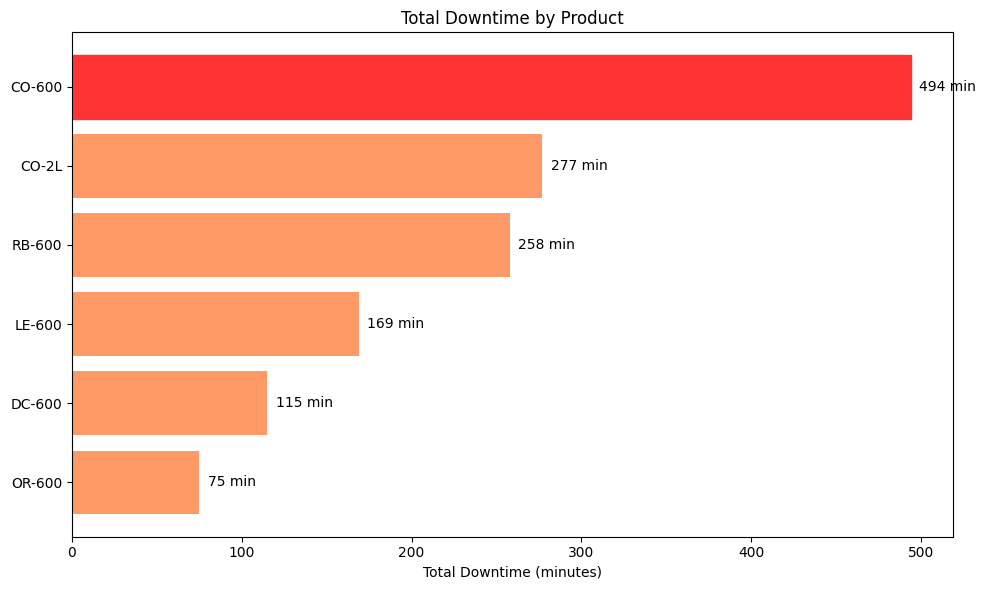

In [52]:
#19) Which Product experienced the most downtime?

# Group by Product and sum total downtime
product_downtime = df_productivity.groupby("Product")["Total Downtime by Batch"].sum().sort_values(ascending=False)

# Identify the product with the most downtime
most_downtime_product = product_downtime.idxmax()
max_downtime = product_downtime.max()

# Visualization: Horizontal bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.barh(product_downtime.index, product_downtime.values, color='#ff9966')
plt.xlabel("Total Downtime (minutes)")
plt.title("Total Downtime by Product")

# Highlight the product with the most downtime
bars[0].set_color('#ff3333')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width:.0f} min', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Highest bar at the top
plt.tight_layout()
plt.show()


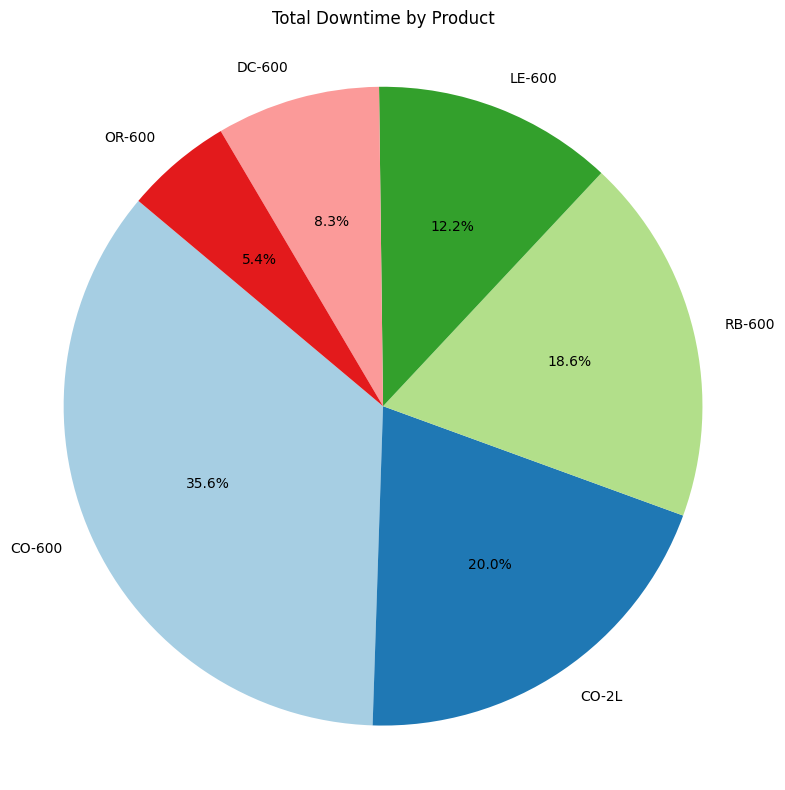

In [53]:
#19) Which Product experienced the most downtime?

# Group by Product and sum total downtime
product_downtime = df_productivity.groupby("Product")["Total Downtime by Batch"].sum().sort_values(ascending=False)

# Identify the product with the most downtime
most_downtime_product = product_downtime.idxmax()
max_downtime = product_downtime.max()

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_downtime, labels=product_downtime.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title("Total Downtime by Product")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()







Columns in Transformed Line Downtime sheet: ['Date', 'Product', 'Batch', 'Operator', 'Start Time', 'End Time', 'Batch Duration', 'Min batch time', 'Total Downtime by Batch']
Top Batches with Most Downtime:
 Batch
422147    107
422111     75
422123     73
422140     63
422146     62
422118     60
422143     58
422144     54
422120     52
422128     52
Name: Total Downtime by Batch, dtype: int64


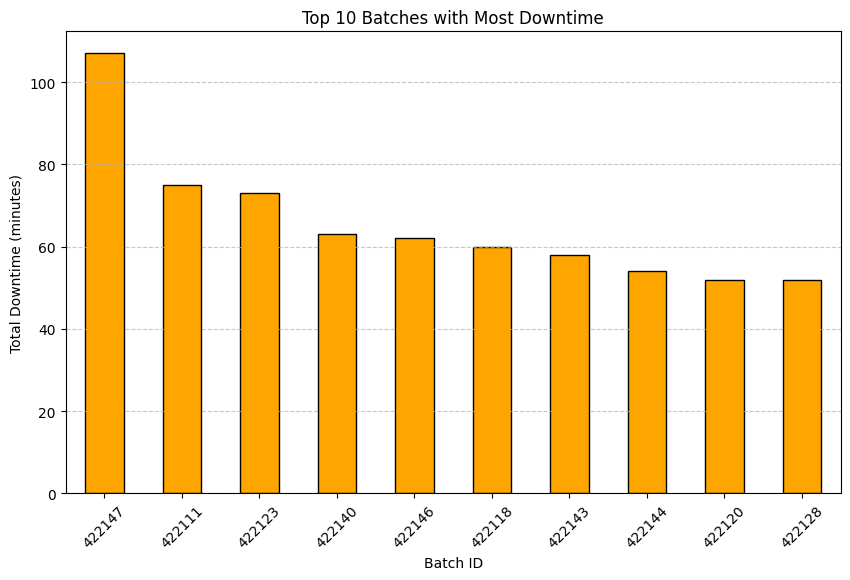

In [54]:
#Q20) Which Top 10 Batches with Most Downtime ?


# Read the Transformed Line Downtime sheet
df_downtime = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")
df_downtime.columns = df_downtime.columns.str.strip()  # Remove extra spaces

# Print actual column names
print("Columns in Transformed Line Downtime sheet:", df_downtime.columns.tolist())

# Manually set correct column names after checking the output
batch_column = "Batch"  # Replace with actual batch column name
duration_column = "Total Downtime by Batch"  # Replace with actual downtime column name

# Group by batch and sum downtime duration
batch_downtime = df_downtime.groupby(batch_column)[duration_column].sum()

# Get the top 10 batches with the most downtime
top_batches = batch_downtime.nlargest(10)

# Print the results
print("Top Batches with Most Downtime:\n", top_batches)

# Visualize as a bar chart
plt.figure(figsize=(10, 6))
top_batches.plot(kind="bar", color="orange", edgecolor="black")

# Add labels and title
plt.xlabel("Batch ID")
plt.ylabel("Total Downtime (minutes)")
plt.title("Top 10 Batches with Most Downtime")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [55]:
#Performance Trends:

Index(['Date', 'Product', 'Batch', 'Operator', 'Start Time', 'End Time',
       'Batch Duration', 'Min batch time', 'Total Downtime by Batch'],
      dtype='object')
✅ There is a significant relationship between batch count and downtime (Correlation: 0.94, p-value: 0.00455)


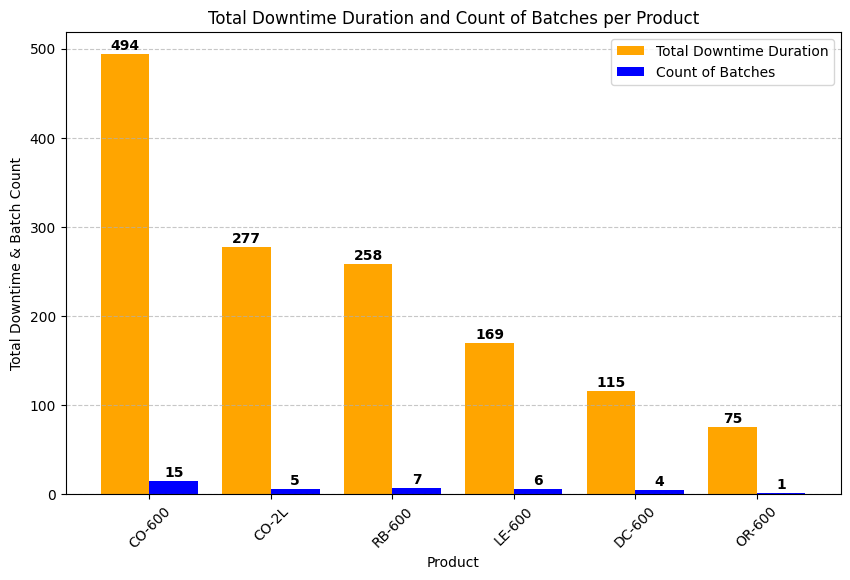

In [56]:
#Q21) Is there a relationship between batch size and downtime?


from scipy.stats import pearsonr

# Load data
df = pd.read_excel(file_path, sheet_name="Transformed Line Productivity")


# Remove any extra spaces in column names
df.columns = df.columns.str.strip()

# Print column names for verification
print(df.columns)

# Ensure correct column names
if "Product" not in df.columns or "Total Downtime by Batch" not in df.columns:
    raise KeyError("Check column names! Expected 'Product' and 'Total Downtime by Batch'.")

# Aggregate total downtime and batch count by product
downtime_per_product = df.groupby("Product")["Total Downtime by Batch"].sum()
batch_count_per_product = df.groupby("Product")["Batch"].count()

# Check correlation between batch count and downtime
correlation, p_value = pearsonr(batch_count_per_product, downtime_per_product)

# Determine relationship
if abs(correlation) > 0.5 and p_value < 0.05:
    print(f"✅ There is a significant relationship between batch count and downtime (Correlation: {correlation:.2f}, p-value: {p_value:.5f})")
else:
    print(f"❌ There is no strong relationship between batch count and downtime (Correlation: {correlation:.2f}, p-value: {p_value:.5f})")

# Sort by total downtime in descending order
downtime_per_product = downtime_per_product.sort_values(ascending=False)
batch_count_per_product = batch_count_per_product.loc[downtime_per_product.index]  # Reorder batch count to match sorted downtime

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.4
x_indexes = np.arange(len(downtime_per_product))

# Plot bars
bars1 = ax.bar(x_indexes - bar_width/2, downtime_per_product, bar_width, color="orange", label="Total Downtime Duration")
bars2 = ax.bar(x_indexes + bar_width/2, batch_count_per_product, bar_width, color="blue", label="Count of Batches")

# Add data labels
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, int(bar.get_height()), ha="center", fontsize=10, fontweight="bold")

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, int(bar.get_height()), ha="center", fontsize=10, fontweight="bold")

# Labels and title
ax.set_xlabel("Product")
ax.set_ylabel("Total Downtime & Batch Count")
ax.set_title("Total Downtime Duration and Count of Batches per Product")
ax.set_xticks(x_indexes)
ax.set_xticklabels(downtime_per_product.index, rotation=45)
ax.legend()

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [57]:
#Phase 3: Forecasting Questions 

In [58]:
#1) Data Preparation: Extracting time series data for downtime and batch production.
    
# Check available sheet names
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Line productivity',
 'Products',
 'Downtime factors',
 'Line downtime',
 'Transformed Line downtime',
 'Transformed Products',
 'Transformed Line Productivity']

In [59]:

# Display the first few rows
df.head()


,Date,Product,Batch,Operator,Start Time,End Time,Batch Duration,Min batch time,Total Downtime by Batch
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00,135,60,75
1,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00,100,60,40
2,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00,110,60,50
3,2024-08-29,LE-600,422114,Mac,17:35:00,19:15:00,100,60,40
4,2024-08-29,LE-600,422115,Charlie,19:15:00,20:39:00,84,60,24


In [60]:
# Convert "Date" to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate total downtime and batch count per day
daily_data = df.groupby("Date").agg(
    Total_Downtime=("Total Downtime by Batch", "sum"),
    Batch_Count=("Batch", "count")
).reset_index()

# Display the first few rows of the processed data
daily_data.head()


,Date,Total_Downtime,Batch_Count
0,2024-08-29,244,7
1,2024-08-30,444,12
2,2024-08-31,165,7
3,2024-09-02,503,11
4,2024-09-03,32,1


Predicted Downtime (next 2 days): (399, 154)
Predicted Batch Count (next 2 days): (9, 5)


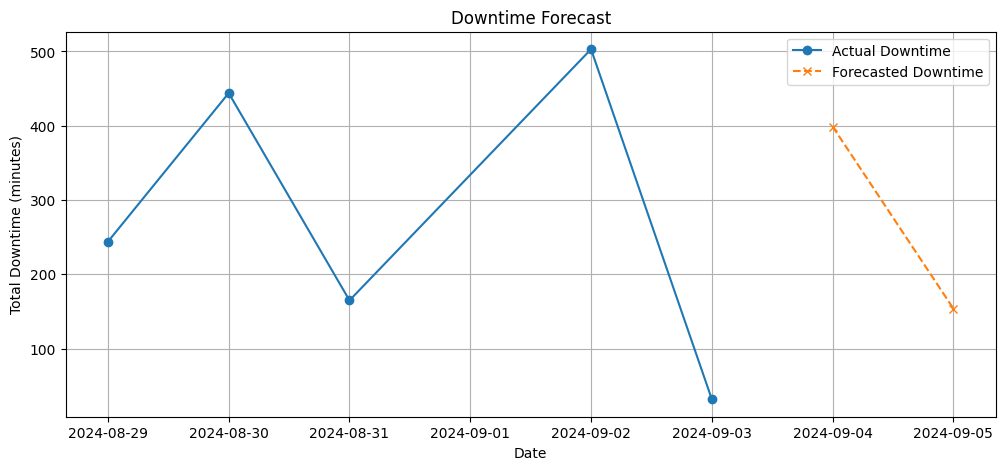

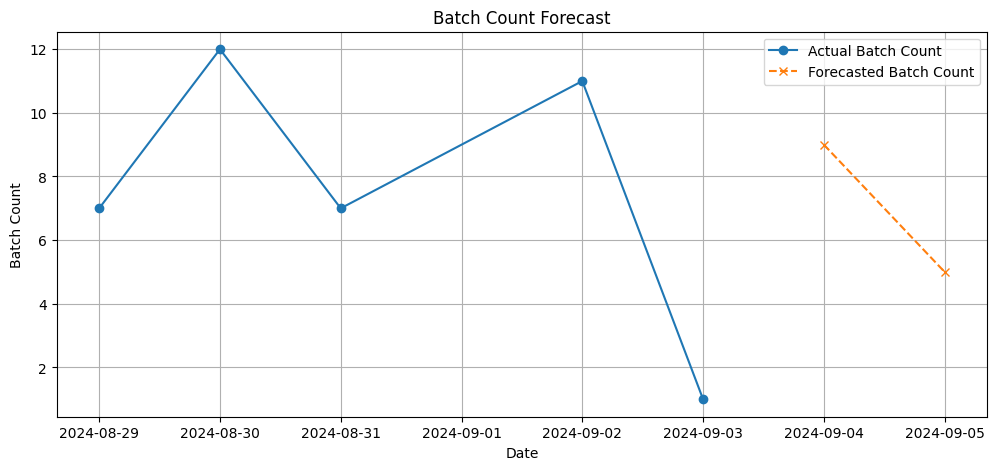

In [61]:
# Forecasting Downtime and Batch Count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the Excel file
file_path = r"F:\Rawad Misr\Data Analysis\Projects\Final Projects\Final Project\Manufacturing_Line_Productivity.xlsx"
xls = pd.ExcelFile(file_path)

# Parse the productivity sheet and convert dates
productivity_df = xls.parse('Transformed Line Productivity')
productivity_df['Date'] = pd.to_datetime(productivity_df['Date'])

# Aggregate total downtime and batch count per day
daily_summary = productivity_df.groupby('Date').agg(
    total_downtime=('Total Downtime by Batch', 'sum'),
    batch_count=('Batch', 'nunique')
).reset_index()

# Create lag features for time series forecasting
def create_lag_features(df, target_col, lags=[1, 2, 3]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df.dropna()

# Downtime model
lagged_downtime = create_lag_features(daily_summary, 'total_downtime')
X_downtime = lagged_downtime[[f'total_downtime_lag{i}' for i in [1, 2, 3]]]
y_downtime = lagged_downtime['total_downtime']
downtime_model = RandomForestRegressor(random_state=42).fit(X_downtime, y_downtime)

# Batch count model
lagged_batch = create_lag_features(daily_summary, 'batch_count')
X_batch = lagged_batch[[f'batch_count_lag{i}' for i in [1, 2, 3]]]
y_batch = lagged_batch['batch_count']
batch_model = RandomForestRegressor(random_state=42).fit(X_batch, y_batch)

# Forecast next two days
def forecast_next_two(model, last_values):
    pred_day1 = model.predict([last_values])[0]
    pred_day2 = model.predict([[pred_day1] + list(last_values[:2])])[0]
    return round(pred_day1), round(pred_day2)

last_downtime_vals = daily_summary['total_downtime'].iloc[-3:].values[::-1]
downtime_forecast = forecast_next_two(downtime_model, last_downtime_vals)

last_batch_vals = daily_summary['batch_count'].iloc[-3:].values[::-1]
batch_forecast = forecast_next_two(batch_model, last_batch_vals)

print("Predicted Downtime (next 2 days):", downtime_forecast)
print("Predicted Batch Count (next 2 days):", batch_forecast)

# Visualization
forecast_dates = pd.date_range(start=daily_summary['Date'].max() + pd.Timedelta(days=1), periods=2)

# Extend actual data for plotting
plot_df = daily_summary.copy()
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'total_downtime': downtime_forecast,
    'batch_count': batch_forecast
})

# Plot downtime
plt.figure(figsize=(12, 5))
plt.plot(plot_df['Date'], plot_df['total_downtime'], label='Actual Downtime', marker='o')
plt.plot(forecast_df['Date'], forecast_df['total_downtime'], label='Forecasted Downtime', marker='x', linestyle='--')
plt.title('Downtime Forecast')
plt.xlabel('Date')
plt.ylabel('Total Downtime (minutes)')
plt.legend()
plt.grid(True)
plt.show()

# Plot batch count
plt.figure(figsize=(12, 5))
plt.plot(plot_df['Date'], plot_df['batch_count'], label='Actual Batch Count', marker='o')
plt.plot(forecast_df['Date'], forecast_df['batch_count'], label='Forecasted Batch Count', marker='x', linestyle='--')
plt.title('Batch Count Forecast')
plt.xlabel('Date')
plt.ylabel('Batch Count')
plt.legend()
plt.grid(True)
plt.show()
